**Sistemas Difusos**

* _Maria Alejandra Bonilla Diaz - 20251595002_ 
* _Alvaro Alejandro Zarabanda Gutierrez – 20251595006_

#
1. Considere la siguiente función de pertenencia que describe 5 conjuntos fuzzy que representan la temperatura de un proceso industrial.

![Enunciado](./assets/enunciado_p1.png)

A: Muy Baja  
B: Baja  
C: Media  
D: Alta  
E: Muy Alta

La función de pertenencia está definida por cinco conjuntos triangulares, cada uno representando un rango de temperatura.

Se solicita:

a) Encuentre las expresiones analíticas para cada uno de los conjuntos fuzzy.

b) Elabore los procedimientos computacionales que permitan mapear los conjuntos fuzzy mostrados anteriormente, utilizando 1000 puntos de discretización.

c) Elabore los procedimientos computacionales para indicar, dado un valor de x, cuáles conjuntos están activos.

d) Elabore los procedimientos computacionales para retornar el nivel de pertenencia de un conjunto fuzzy dado un valor x.

e) Elabore los procedimientos computacionales para retornar el conjunto crisp representando el α-corte efectuado.

**Librerías e imports**

In [ ]:
%%capture
%pip install numpy
%pip install matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#
a) Expresiones analíticas para cada conjunto fuzzy
Las funciones de pertenencia para los cinco conjuntos fuzzy, según los puntos de corte y fórmulas de la imagen, son:

- **A (Muy Baja):**
$$
\mu_A(x) = \begin{cases}
1, & 0 \leq x \leq 5 \\
\frac{15-x}{10}, & 5 < x \leq 15 \\
0, & x > 15
\end{cases}
$$

- **B (Baja):**
$$
\mu_B(x) = \begin{cases}
0, & x < 5 \\
\frac{x-5}{10}, & 5 \leq x < 15 \\
1 - \frac{x-15}{10}, & 15 \leq x < 25 \\
0, & x \geq 25
\end{cases}
$$

- **C (Media):**
$$
\mu_C(x) = \begin{cases}
0, & x < 15 \\
\frac{x-15}{10}, & 15 \leq x < 25 \\
1 - \frac{x-25}{10}, & 25 \leq x < 35 \\
0, & x \geq 35
\end{cases}
$$

- **D (Alta):**
$$
\mu_D(x) = \begin{cases}
0, & x < 25 \\
\frac{x-25}{10}, & 25 \leq x < 35 \\
1 - \frac{x-35}{10}, & 35 \leq x < 45 \\
0, & x \geq 45
\end{cases}
$$

- **E (Muy Alta):**
$$
\mu_E(x) = \begin{cases}
0, & x < 35 \\
\frac{x-35}{10}, & 35 \leq x < 45 \\
1, & 45 \leq x \leq 50 \\
0, & x > 50
\end{cases}
$$

##
b) Procedimiento computacional para mapear los conjuntos fuzzy con 1000 puntos de discretización

A continuación se definen las funciones de pertenencia y se realiza el gráfico de los cinco conjuntos fuzzy.

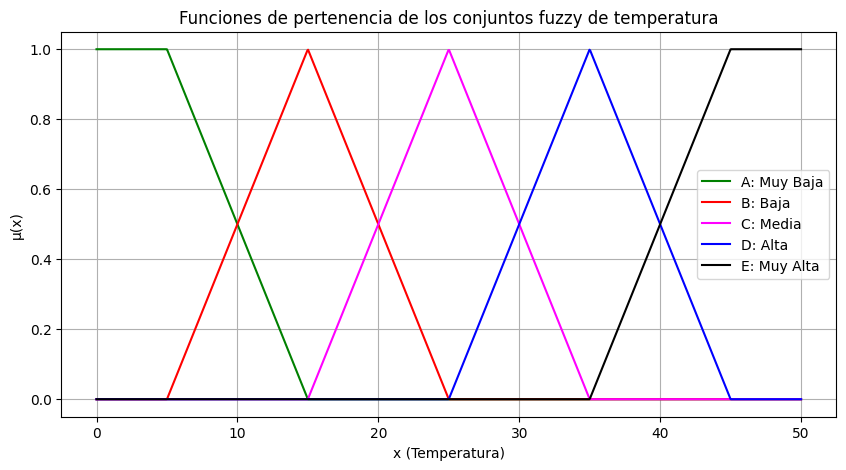

In [ ]:
def mu_A(x):
    if 0 <= x <= 5:
        return 1
    elif 5 < x <= 15:
        return (15 - x) / 10
    else:
        return 0

def mu_B(x):
    if 5 <= x < 15:
        return (x-5)/10
    elif 15 <= x < 25:
        return 1 - (x-15)/10
    else:
        return 0

def mu_C(x):
    if 15 <= x < 25:
        return (x-15)/10
    elif 25 <= x < 35:
        return 1 - (x-25)/10
    else:
        return 0

def mu_D(x):
    if 25 <= x < 35:
        return (x-25)/10
    elif 35 <= x < 45:
        return 1 - (x-35)/10
    else:
        return 0

def mu_E(x):
    if 35 <= x < 45:
        return (x-35)/10
    elif 45 <= x <= 50:
        return 1
    else:
        return 0

x_vals = np.linspace(0, 50, 1000)
y_A = [mu_A(x) for x in x_vals]
y_B = [mu_B(x) for x in x_vals]
y_C = [mu_C(x) for x in x_vals]
y_D = [mu_D(x) for x in x_vals]
y_E = [mu_E(x) for x in x_vals]

plt.figure(figsize=(10,5))
plt.plot(x_vals, y_A, label='A: Muy Baja', color='green')
plt.plot(x_vals, y_B, label='B: Baja', color='red')
plt.plot(x_vals, y_C, label='C: Media', color='magenta')
plt.plot(x_vals, y_D, label='D: Alta', color='blue')
plt.plot(x_vals, y_E, label='E: Muy Alta', color='black')
plt.title('Funciones de pertenencia de los conjuntos fuzzy de temperatura')
plt.xlabel('x (Temperatura)')
plt.ylabel('μ(x)')
plt.legend()
plt.grid(True)
plt.show()

##
c) Procedimiento computacional para indicar conjuntos activos dado un valor de x

Se define una función que, dado un valor de x, retorna los conjuntos fuzzy que están activos (μ(x) > 0).

In [ ]:
def conjuntos_activos(x):
    activos = []
    if mu_A(x) > 0:
        activos.append('A: Muy Baja')
    if mu_B(x) > 0:
        activos.append('B: Baja')
    if mu_C(x) > 0:
        activos.append('C: Media')
    if mu_D(x) > 0:
        activos.append('D: Alta')
    if mu_E(x) > 0:
        activos.append('E: Muy Alta')
    return activos

# Ejemplo de uso
x_ejemplo = 20
print(f"Para x = {x_ejemplo}, conjuntos activos:", conjuntos_activos(x_ejemplo))

Para x = 20, conjuntos activos: ['B: Baja', 'C: Media']


##
d) Procedimiento computacional para retornar el nivel de pertenencia de un conjunto fuzzy dado un valor x

Se define una función que retorna el valor de pertenencia para el conjunto seleccionado y el valor x dado.

In [ ]:
def nivel_pertenencia(conjunto, x):
    if conjunto == 'A':
        return mu_A(x)
    elif conjunto == 'B':
        return mu_B(x)
    elif conjunto == 'C':
        return mu_C(x)
    elif conjunto == 'D':
        return mu_D(x)
    elif conjunto == 'E':
        return mu_E(x)
    else:
        raise ValueError('Conjunto no válido')

# Ejemplo de uso
print(f"Nivel de pertenencia de x=20 en conjunto B: {nivel_pertenencia('B', 20):.2f}")

Nivel de pertenencia de x=20 en conjunto B: 0.50


##
e) Procedimiento computacional para retornar el conjunto crisp representando el α-corte

Se define una función que, dado un conjunto fuzzy y un valor de α, retorna el intervalo (α-corte) donde la función de pertenencia es mayor o igual a α.

In [ ]:
def alpha_corte(conjunto, alpha, x_min=0, x_max=50, n_puntos=1000):
    x_vals = np.linspace(x_min, x_max, n_puntos)
    if conjunto == 'A':
        mu_vals = [mu_A(x) for x in x_vals]
    elif conjunto == 'B':
        mu_vals = [mu_B(x) for x in x_vals]
    elif conjunto == 'C':
        mu_vals = [mu_C(x) for x in x_vals]
    elif conjunto == 'D':
        mu_vals = [mu_D(x) for x in x_vals]
    elif conjunto == 'E':
        mu_vals = [mu_E(x) for x in x_vals]
    else:
        raise ValueError('Conjunto no válido')
    corte = [x for x, mu in zip(x_vals, mu_vals) if mu >= alpha]
    return corte

# Ejemplo de uso
corte_B_05 = alpha_corte('B', 0.5)
if corte_B_05:
    print(f"α-corte para conjunto B con α=0.5: [{min(corte_B_05):.2f}, {max(corte_B_05):.2f}]")
else:
    print("No hay valores en el α-corte para ese conjunto y α.")

α-corte para conjunto B con α=0.5: [10.01, 19.97]
